In [11]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from data_managers.load_save_cmems_sst import load_cmems_sst

ds_cmems_sst = load_cmems_sst(
    # years=range(2009, 2012),
    # lon_selector=slice(-1, 5),
    # lat_selector=slice(37.7, 41)
    region_selector="balears",
)
ds_cmems_sst

Loaded CMEMS-SST dataset.


<xarray.Dataset> Size: 508MB
Dimensions:  (time: 15340, lat: 69, lon: 120)
Coordinates:
  * lat      (lat) float32 276B 37.65 37.7 37.75 37.8 ... 40.96 41.01 41.06
  * lon      (lon) float32 480B -0.8591 -0.8091 -0.7591 ... 4.996 5.046 5.096
  * time     (time) datetime64[ns] 123kB 1982-01-01 1982-01-02 ... 2023-12-31
Data variables:
    T        (time, lat, lon) float32 508MB dask.array<chunksize=(31, 69, 120), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                CF-1.4 
    title:                      Mediterranean Sea SST Analysis L4, Reprocesse...
    summary:                    [1982-2018] Daily gap-free maps (L4) at 0.05d...
    references:                 A. Pisano, B. Buongiorno Nardelli, C. Troncon...
    institution:                GOS
    history:                    Mon Jun 10 12:26:11 2024: ncrcat 198201010000...
    ...                         ...
    publisher_name:             CNR ISMAR GOS - CMEMS SST-TAC
    publisher_url:              http://marine.copernicus.eu/
    publisher_email:            servicedesk.cmems@mercator-ocean.eu, gsdk@isa...
    processing_level:           L4
    cdm_data_type:              grid
    NCO:                        netCDF Operators version 5.0.6 (Homepage = ht...

## Compute MHWs

In [13]:
from mhws_computers.mhw_computer import compute_mhw_maps_apply_ufunc
from data_managers.load_save_mhws import save_mhws_dataset

clim_period = (1987, 2021)

ds_mhws = compute_mhw_maps_apply_ufunc(
    ds_cmems_sst,
    using_dataset="cmems_sst",
    clim_period=clim_period
    # ds_cmems_sst.isel(lon=range(60),lat=range(40)),
)

# Computing the dataset and saving it into nc_file
ds_mhws = save_mhws_dataset(
    ds_mhws,
    dataset_used="cmems_sst",
    region="balears",
    clim_period=clim_period,
    
    progress_bar=True,
    profilers=True
)

ds_mhws

Saving MHWs dataset to /LOCALDATA/ARTHURs_FILES/Codigos/../Datos/mhws/cmems_sst_mhws_balears_1987_2021.nc
[########################################] | 100% Completed | 66m 9ss
 -> Saved!


<xarray.Dataset> Size: 50MB
Dimensions:               (lon: 120, lat: 69, year: 42)
Coordinates:
  * lon                   (lon) float32 480B -0.8591 -0.8091 ... 5.046 5.096
  * lat                   (lat) float32 276B 37.65 37.7 37.75 ... 41.01 41.06
  * year                  (year) int64 336B 1982 1983 1984 ... 2021 2022 2023
Data variables: (12/18)
    count                 (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 8.0 9.0
    total_days            (lat, lon, year) float64 3MB 0.0 0.0 ... 135.0 115.0
    moderate_days         (lat, lon, year) float64 3MB 0.0 0.0 ... 101.0 94.0
    strong_days           (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 34.0 20.0
    severe_days           (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 0.0 0.0
    extreme_days          (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 0.0 0.0
    ...                    ...
    duration              (lat, lon, year) float64 3MB nan nan ... 16.88 12.78
    rate_onset            (lat, lon, year) float64 3MB nan nan ... 0.2125 0.2357
    rate_decline          (lat, lon, year) float64 3MB nan nan ... 0.5874 0.3342
    temp_min              (lat, lon, year) float64 3MB nan nan ... 13.0 13.04
    temp_mean             (lat, lon, year) float64 3MB nan nan ... 19.78 19.58
    temp_max              (lat, lon, year) float64 3MB nan nan ... 29.12 28.81
Attributes:
    climatologyPeriod:  1987-2021
    description:        MHWs yearly statistics computed using the marineHeatW...
    acknowledgment:     Generated using E.U. Copernicus Marine Service Inform...

## Compute MHWs using climatology

In [4]:
from mhws_computers import marineHeatWaves as mhw

clim_period = [1987,2021]

da = ds_cmems_sst.isel(lat=1, lon=1)

t = da.time.values.astype('datetime64[D]').astype(int) + 719163
sst = da.T.values


mhws, clim = mhw.detect(t, sst, climatologyPeriod=clim_period)

In [8]:
clim

{'thresh': array([16.07651466, 16.02528864, 15.97528864, ..., 16.24116014,
        16.18380501, 16.12883714]),
 'seas': array([15.14228166, 15.09664197, 15.0517237 , ..., 15.28240647,
        15.23527284, 15.18836627]),
 'missing': array([False, False, False, ..., False, False, False])}

In [ ]:
from mhws_computers.mhw_computer import compute_mhw_maps_apply_ufunc
from data_managers.load_save_dataset import save_mhws_dataset, load_cmems_sst_clim

clim_period = [1987,2021]

clim = load_cmems_sst_clim()

ds_mhws = compute_mhw_maps_apply_ufunc(
    ds_cmems_sst,
    clim_period=clim_period
    # ds_cmems_sst.isel(lon=range(60),lat=range(40)),
)

# Computing the dataset and saving it into nc_file
ds_mhws = save_mhws_dataset(
    ds_mhws,
    clim_period=clim_period,
    region="balears",
    progress_bar=True,
    profilers=True
)

ds_mhws

## TESTS

In [11]:
from datetime import datetime
datetime.now().isoformat()
# datetime.now().strftime('YYYY-MM-DD.html')
# visualize([prof, rprof], datetime.now().strftime, show=True, save=True)

'2025-05-20T17:25:32.583976'

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd

# Dummy time series data
time = pd.date_range("2020-01-01", periods=10, freq="D")
lat = np.linspace(-10, 10, 5)
lon = np.linspace(30, 40, 4)

# Create fake SST data (time, lat, lon)
sst = np.random.normal(loc=25, scale=1.0, size=(len(time), len(lat), len(lon)))

# Wrap in xarray DataArray
ds = xr.Dataset({
    "sst": (("time", "lat", "lon"), sst)
}, coords={"time": time, "lat": lat, "lon": lon})

# Chunk for Dask
ds = ds.chunk({"lat": 2, "lon": 2})

def fake_detect(time, sst, **kwargs):
    return {
        "mean": np.mean(sst),
        "std": np.std(sst),
        "max": np.max(sst)
    }

# Define the list of output keys
stat_verbose = ["mean", "std", "max"]

def detect_wrapper(sst, time):
    print("aaa")
    result = fake_detect(time, sst)
    return np.array([result[k] for k in stat_verbose], dtype="float64")

sst_stacked = ds.sst.stack(z=("lat", "lon"))  # (time, z)

results = xr.apply_ufunc(
    detect_wrapper,
    sst_stacked,
    ds.time,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[["stat"]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
    output_sizes={"stat": len(stat_verbose)}
)

# Assign coordinate names to stat
results = results.assign_coords(stat=stat_verbose)

# Convert to dataset
stats_ds = results.to_dataset(dim="stat")

# Unstack back to (lat, lon)
stats_ds = stats_ds.unstack("z")
stats_ds.compute()

/tmp/ipykernel_226568/67901696.py:38: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  results = xr.apply_ufunc(


<xarray.Dataset> Size: 552B
Dimensions:  (lat: 5, lon: 4)
Coordinates:
  * lat      (lat) float64 40B -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 32B 30.0 33.33 36.67 40.0
Data variables:
    mean     (lat, lon) float64 160B 24.67 24.57 24.86 ... 25.46 24.7 24.89
    std      (lat, lon) float64 160B 0.9096 0.9124 1.003 ... 0.8259 0.7814 1.05
    max      (lat, lon) float64 160B 25.74 25.76 27.07 ... 27.52 25.81 27.01

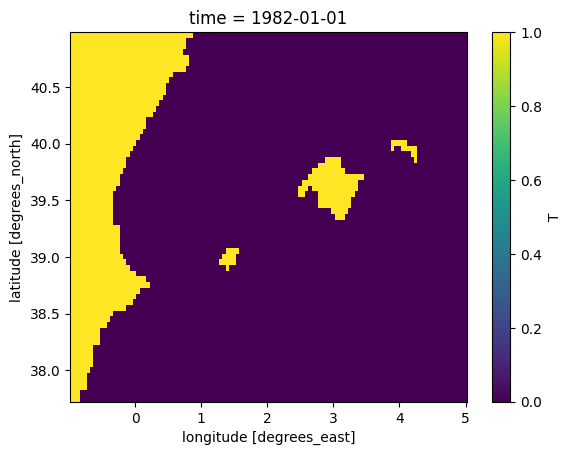

In [60]:
ds_cmems_sst.T.isel(time=0).isnull().plot()

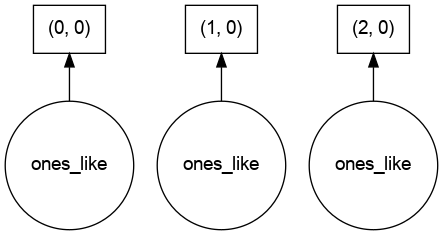

In [1]:
import dask.array as da

x = da.ones((6,1), chunks=(2,1))
x.visualize()

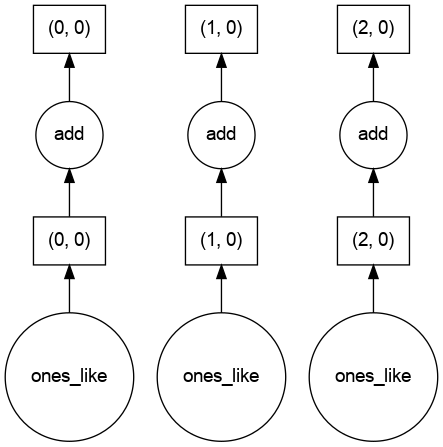

In [2]:
y = 2 + da.ones((6,1), chunks=(2,1))
y.visualize()

In [4]:
z = y.polyfit()

AttributeError: 'Array' object has no attribute 'polyfit'

[########################################] | 100% Completed | 101.72 ms


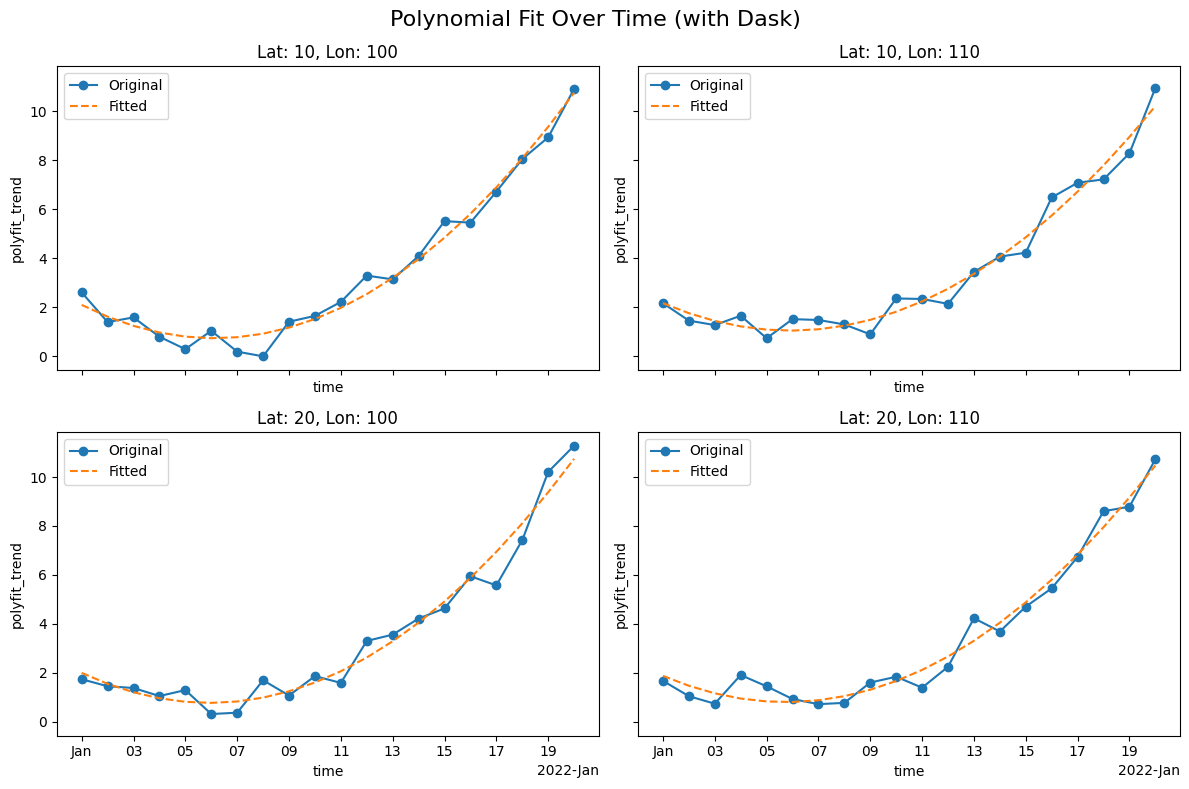

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import dask.array as da

# 1. Generate data
lats = [10, 20]
lons = [100, 110]
times = pd.date_range("2022-01-01", periods=20)
time_index = np.arange(len(times))

# Simulate data with a quadratic trend + noise
def simulate_trend(time_index, noise_scale=0.5):
    trend = 0.05 * time_index**2 - 0.5 * time_index + 2
    noise = np.random.normal(0, noise_scale, size=time_index.shape)
    return trend + noise

data = np.stack([
    simulate_trend(time_index) for _ in range(len(lats) * len(lons))
]).reshape((len(lats), len(lons), len(times)))

# Convert to xarray (with Dask)
da_data = xr.DataArray(
    data.transpose(2, 0, 1),
    coords={"time": times, "lat": lats, "lon": lons},
    dims=["time", "lat", "lon"],
    name="example_data"
).chunk({"lat": 1, "lon": 1})  # Small chunks for demonstration

# 2. Polynomial fitting using numpy.polyfit via apply_ufunc
def polyfit_dask(y, deg=2):
    x = np.arange(y.shape[-1])
    coeffs = np.polyfit(x, y, deg)
    return np.polyval(coeffs, x)

# Use apply_ufunc with Dask to compute polynomial fit over time
fitted = xr.apply_ufunc(
    polyfit_dask,
    da_data,
    input_core_dims=[["time"]],
    output_core_dims=[["time"]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float]
)

fitted.name = "polyfit_trend"

# 3. Trigger computation and visualize Dask graph
from dask.diagnostics import Profiler, ProgressBar, visualize

with ProgressBar(), Profiler() as prof:
    fitted_result = fitted.compute()

# Optional: Visualize Dask computation graph
# fitted.data.visualize(filename="dask_polyfit_graph.svg")
fitted.data.visualize()

# 4. Plot original vs fitted
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for i, lat in enumerate(lats):
    for j, lon in enumerate(lons):
        ax = axs[i, j]
        da_data.sel(lat=lat, lon=lon).compute().plot(ax=ax, label="Original", marker='o')
        fitted_result.sel(lat=lat, lon=lon).plot(ax=ax, label="Fitted", linestyle="--")
        ax.set_title(f"Lat: {lat}, Lon: {lon}")
        ax.legend()

plt.suptitle("Polynomial Fit Over Time (with Dask)", fontsize=16)
plt.tight_layout()
plt.show()

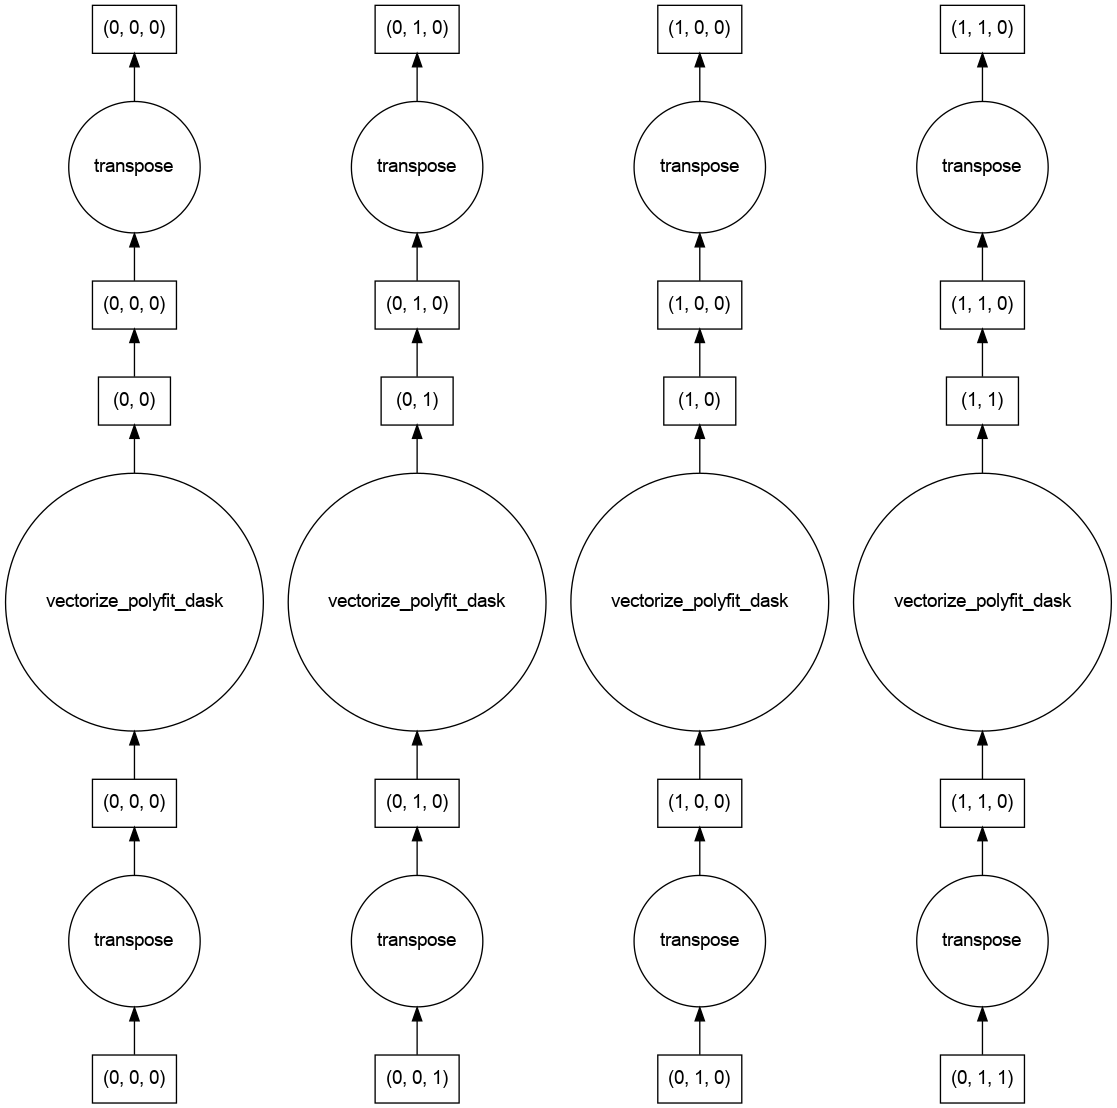

In [6]:
fitted.data.visualize()

## Compute little MHWs dataset

In [ ]:
from mhws_computers.mhw_computer import compute_mhw_maps_apply_ufunc
from data_managers.load_save_mhws import save_mhws_dataset
from data_managers.load_save_cmems_sst import load_cmems_sst

ds_cmems_sst = load_cmems_sst(
    years=range(2009, 2012),
    # lon_selector=slice(-1, 5),
    # lat_selector=slice(37.7, 41)
    region_selector="balears",
)

ds = ds_cmems_sst.isel(lat=[0,1], lon=[0,1])

clim_period = [2009,2011]

ds_mhws_little = compute_mhw_maps_apply_ufunc(
    ds,
    using_dataset="cmems_sst",
    clim_period=clim_period
    # ds_cmems_sst.isel(lon=range(60),lat=range(40)),
)

from dask.diagnostics import ProgressBar

with ProgressBar():
    # Computing the dataset and saving it into nc_file
    ds_mhws_little = ds_mhws_little.compute()

ds_mhws_little

Loaded CMEMS-SST dataset.
[#################################       ] | 84% Completed | 3.14 s msreceived time array of type <class 'numpy.ndarray'>, shape (1095,)
received sst array of type <class 'numpy.ndarray'>, shape (1095,)
received time array of type <class 'numpy.ndarray'>, shape (1095,)
received sst array of type <class 'numpy.ndarray'>, shape (1095,)
[##################################      ] | 87% Completed | 3.25 sreceived time array of type <class 'numpy.ndarray'>, shape (1095,)
received sst array of type <class 'numpy.ndarray'>, shape (1095,)
[##################################      ] | 87% Completed | 3.35 s

/home/arthur/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:293: RuntimeWarning: Mean of empty slice
  seas_climYear[d-1] = np.nanmean(tempClim[tt.astype(int)])
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:702: RuntimeWarning: Mean of empty slice
  mhwBlock['temp_mean'][i] = np.nanmean(temp[tt])
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:703: RuntimeWarning: All-NaN slice encountered
  mhwBlock['temp_max'][i] = np.nanmax(temp[tt])
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:704: RuntimeWarning: All-NaN slice encountered
  mhwBlock['temp_min'][i] = np.nanmin(temp[tt])


received time array of type <class 'numpy.ndarray'>, shape (1095,)
received sst array of type <class 'numpy.ndarray'>, shape (1095,)
[########################################] | 100% Completed | 3.66 s


<xarray.Dataset> Size: 2kB
Dimensions:               (lon: 2, lat: 2, year: 3)
Coordinates:
  * lon                   (lon) float32 8B -0.8591 -0.8091
  * lat                   (lat) float32 8B 37.65 37.7
  * year                  (year) int64 24B 2009 2010 2011
Data variables: (12/18)
    count                 (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 3.0 1.0
    total_days            (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 19.0 5.0
    moderate_days         (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 18.0 5.0
    strong_days           (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 1.0 0.0
    severe_days           (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 0.0 0.0
    extreme_days          (lat, lon, year) float64 96B 0.0 0.0 0.0 ... 0.0 0.0
    ...                    ...
    intensity_var         (lat, lon, year) float64 96B nan nan ... 0.07216
    rate_onset            (lat, lon, year) float64 96B nan nan ... 0.5756 0.2169
    rate_decline          (lat, lon, year) float64 96B nan nan ... 0.09321
    temp_min              (lat, lon, year) float64 96B nan nan ... 12.14 12.43
    temp_mean             (lat, lon, year) float64 96B nan nan ... 19.36 20.05
    temp_max              (lat, lon, year) float64 96B nan nan ... 28.22 27.9
Attributes:
    climatologyPeriod:  2009-2011
    description:        MHWs yearly statistics computed using the marineHeatW...
    acknowledgment:     Generated using E.U. Copernicus Marine Service Inform...

/home/arthur/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:293: RuntimeWarning: Mean of empty slice
  seas_climYear[d-1] = np.nanmean(tempClim[tt.astype(int)])
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:754: RuntimeWarning: Mean of empty slice
  alpha = 0.05 for 5% significance (or 95% confidence) (DEFAULT = 0.05)
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:755: RuntimeWarning: All-NaN slice encountered
  
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:756: RuntimeWarning: All-NaN slice encountered
  Outputs:
/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:518: RuntimeWarning: invalid value encountered in scalar divide
  


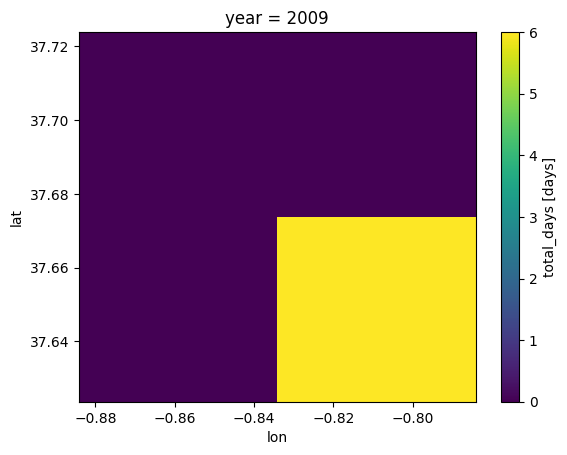

In [11]:
ds_mhws_little.isel(year=0).total_days.plot()